# 1. 匯入所需套件

In [1]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# For functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate, add

C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

# 2.下載並整理 Fashion MNIST 資料集

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Reshape
# Normalize the range of features
x_train = x_train.reshape(60000, 28*28) / x_train.max()
x_test = x_test.reshape(10000, 28*28) / x_test.max()
print('x_train.shape : ',x_train.shape)
print('x_test.shape : ',x_test.shape)

x_train.shape :  (60000, 784)
x_test.shape :  (10000, 784)


In [4]:
# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

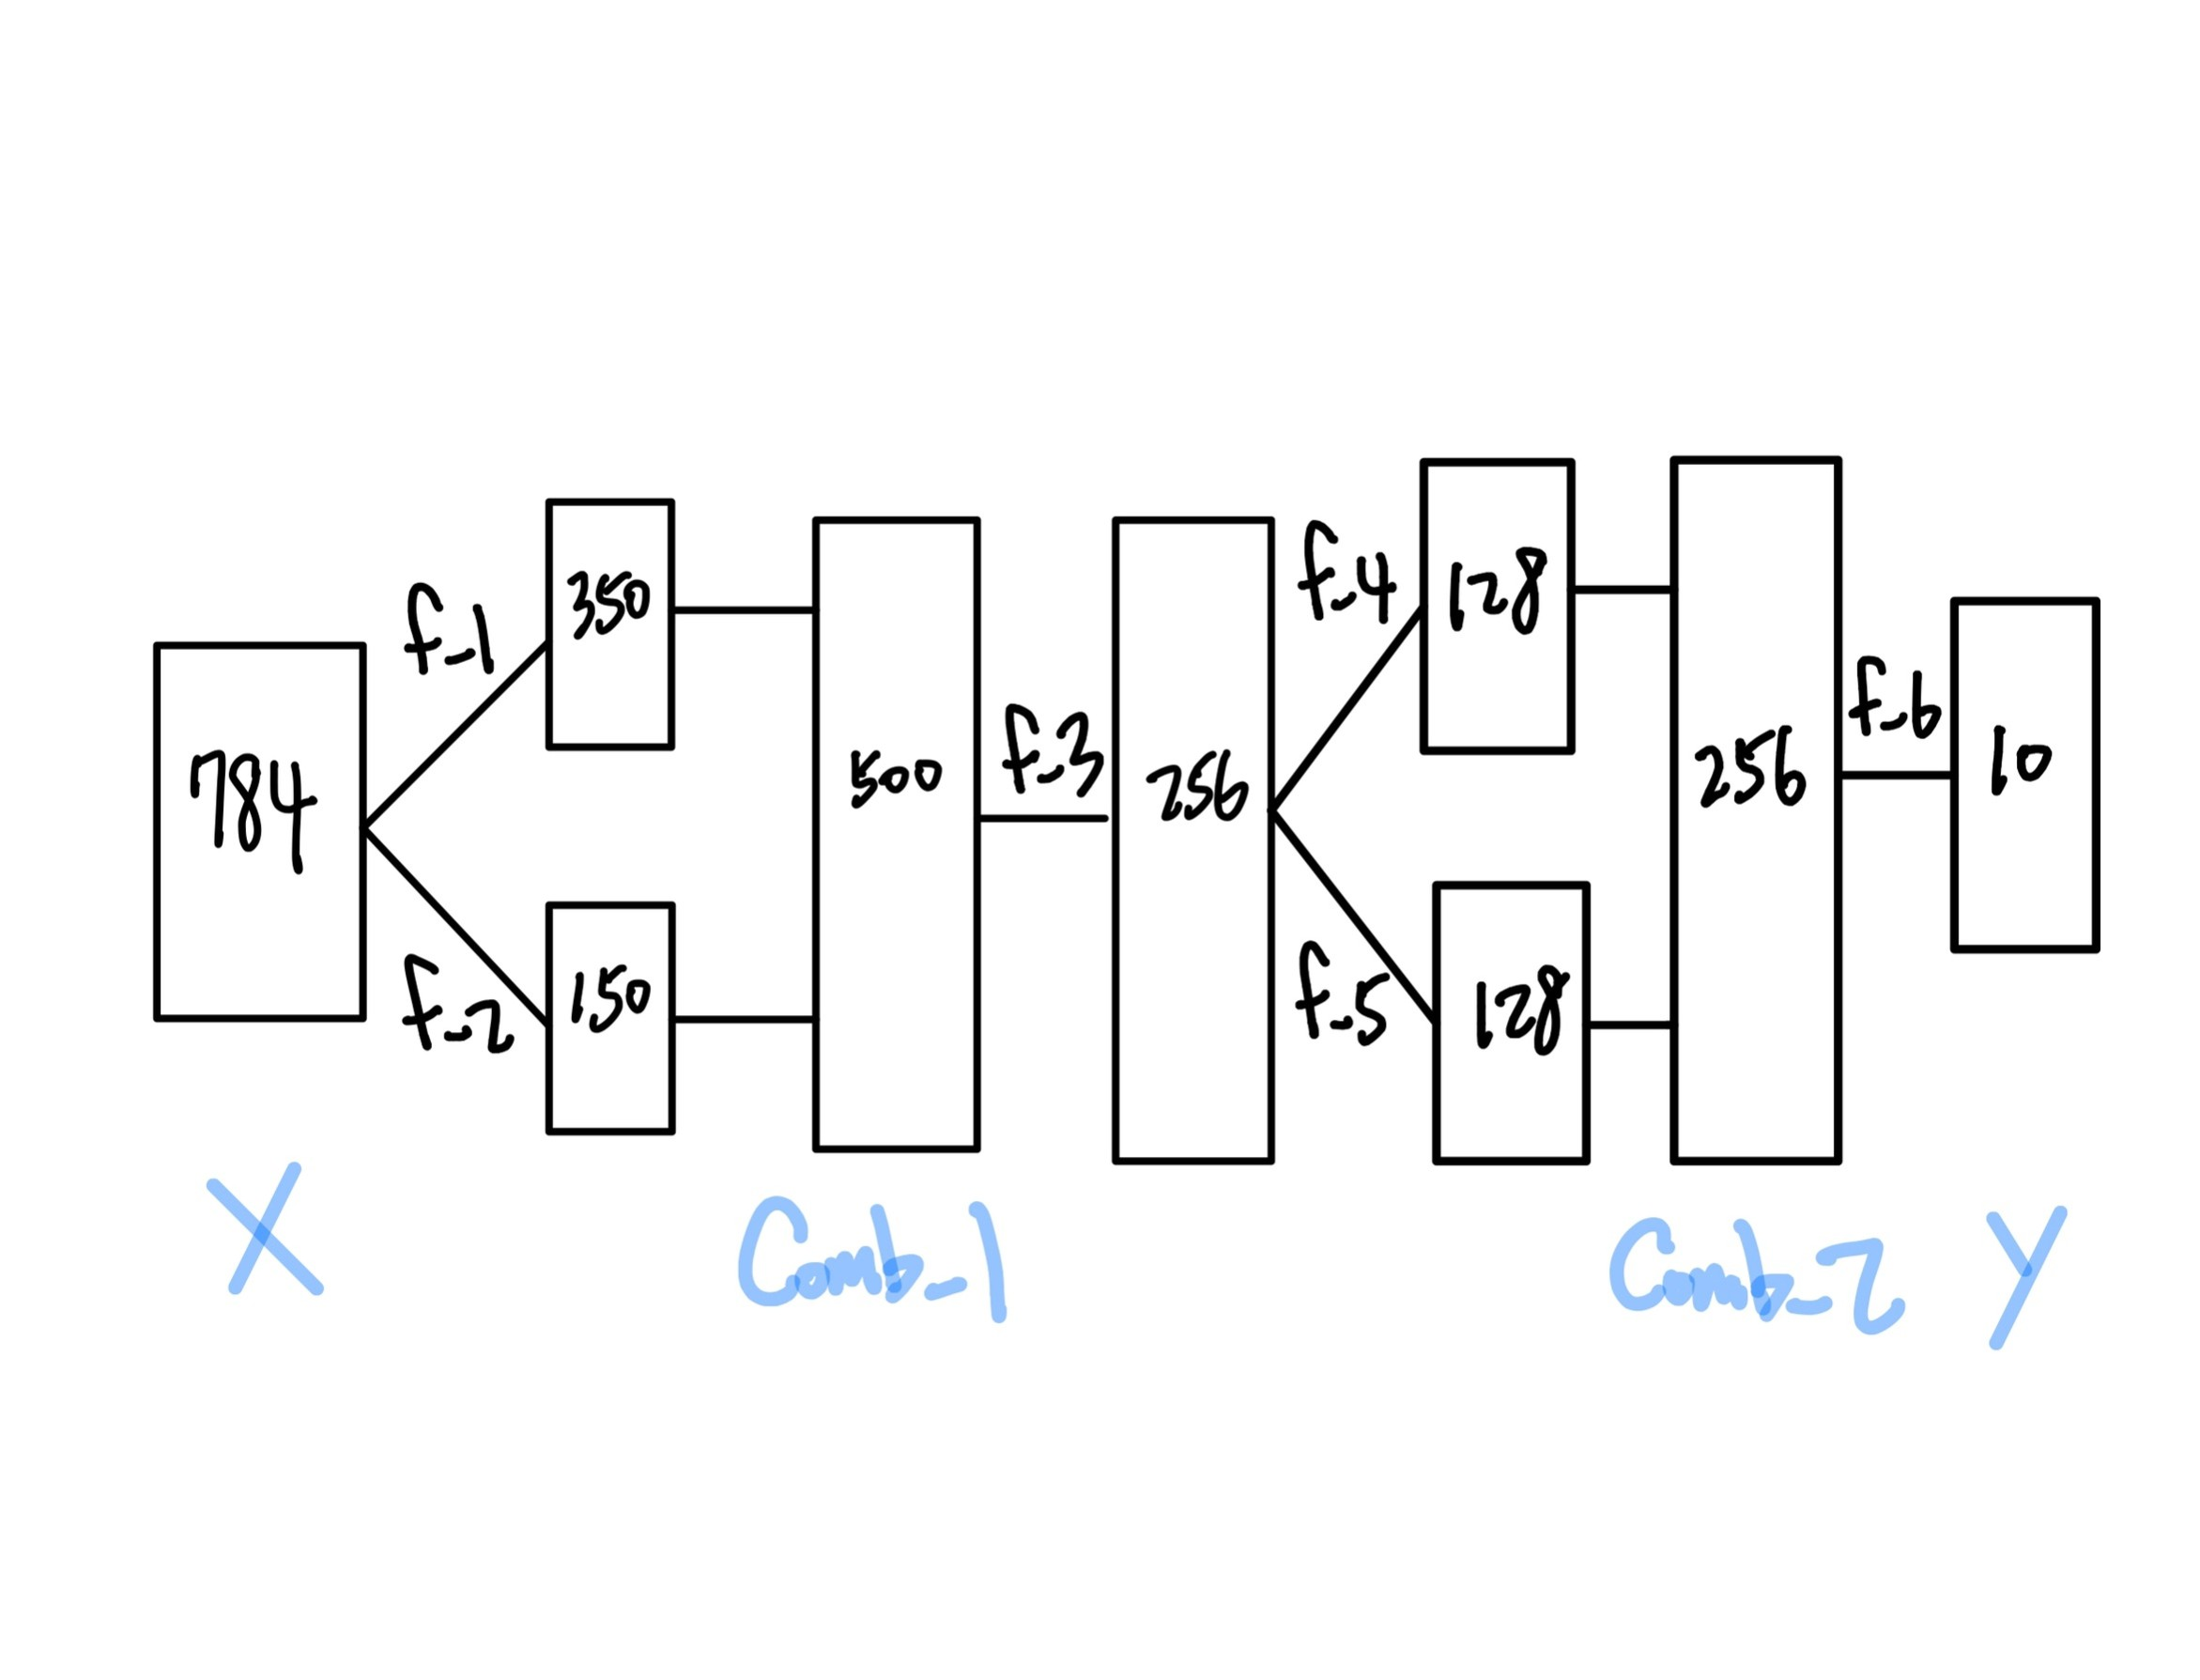

# 3.Functional API部分

In [5]:
f_1 = Dense(350, activation='relu')
f_2 = Dense(150, activation='relu')
f_3 = Dense(256, activation='relu')
f_4 = Dense(128, activation='relu')
f_5 = Dense(128, activation='relu')
f_6 = Dense(10,activation='softmax')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
x = Input(shape=(784,))

In [7]:
print(x)

Tensor("input_1:0", shape=(?, 784), dtype=float32)


In [8]:
h_1 = f_1(x)
h_2 = f_2(x)
comb_1 = concatenate([h_1, h_2])
h_3 = f_3(comb_1)
h_4 = f_4(h_3)
h_5 = f_5(h_3)
comb_2 = concatenate([h_4, h_5])
y = f_6(comb_2)

In [9]:
print(comb_1)
print(comb_2)
print(y)

Tensor("concatenate/concat:0", shape=(?, 500), dtype=float32)
Tensor("concatenate_1/concat:0", shape=(?, 256), dtype=float32)
Tensor("dense_5/Softmax:0", shape=(?, 10), dtype=float32)


In [10]:
model = Model(x, y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 350)          274750      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 150)          117750      input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 500)          0           dense[0][0]                      
                                                                 dense_1[0][0]                

In [11]:
model.compile(loss='mse', 
              optimizer=Adam(), 
              metrics=['accuracy'])

# 4. 模型訓練

In [12]:
history = model.fit(x_train, y_train, 
          batch_size=256, 
          epochs=8,
          validation_data = (x_test, y_test)
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0270 - acc: 0.8120 - val_loss: 0.0219 - val_acc: 0.8478
Epoch 2/8
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0194 - acc: 0.8654 - val_loss: 0.0207 - val_acc: 0.8551
Epoch 3/8
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0174 - acc: 0.8784 - val_loss: 0.0190 - val_acc: 0.8693
Epoch 4/8
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0163 - acc: 0.8876 - val_loss: 0.0187 - val_acc: 0.8712
Epoch 5/8
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0156 - acc: 0.8935 - val_loss: 0.0192 - val_acc: 0.8681
Epoch 6/8
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0148 - acc: 0.8980 - val_loss: 0.0175 - val_acc: 0.8784
Epoch 7/8
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0144 - acc: 0.9010 - val_loss: 0.0186 - 

# 5.模型結果

In [13]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 0s 35us/sample - loss: 0.0180 - acc: 0.8761
Train Accuracy: 90.49333333969116
Test Accuracy: 87.61000037193298


# 6.檢查是否有Overfitting的情況產生

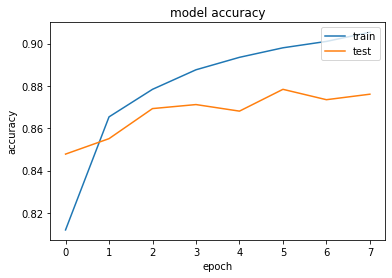

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

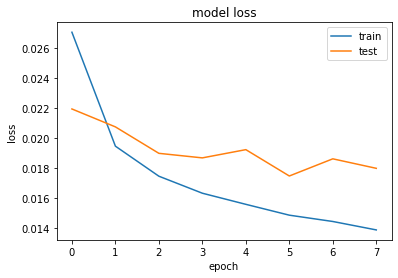

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()